<a href="https://colab.research.google.com/github/faiyazabdullah/ML-Research/blob/main/Load_Digits_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator

# **Data Preprocessing**

In [ ]:
# Load the digits dataset from scikit-learn
digits = load_digits()

# Split the data into features (X) and labels (y)
X = digits.data
y = digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Data Presentation**

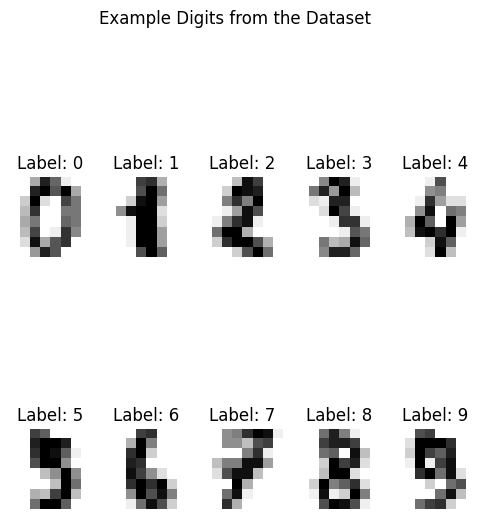

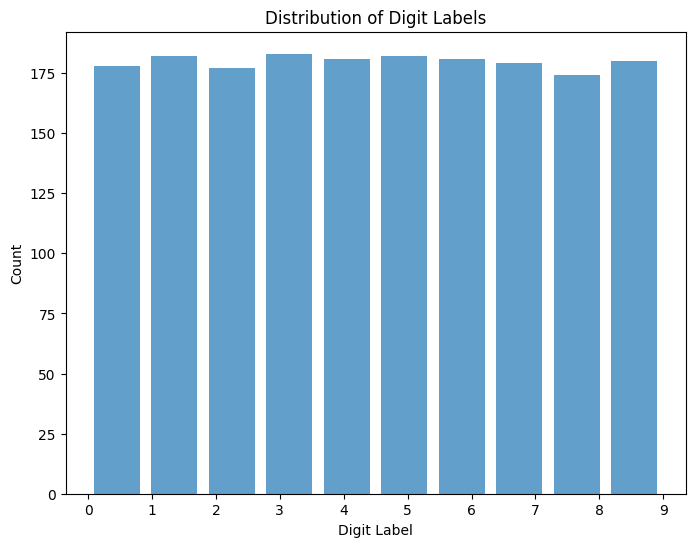

In [ ]:
# Display the first few images and their labels
plt.figure(figsize=(6, 6))
for index, (image, label) in enumerate(zip(digits.images[:10], digits.target[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)
    plt.axis('off')
plt.suptitle("Example Digits from the Dataset", y=1.05)
plt.show()

# Display the distribution of digit labels
plt.figure(figsize=(8, 6))
plt.hist(digits.target, bins=10, align='mid', rwidth=0.8, alpha=0.7)
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.title('Distribution of Digit Labels')
plt.xticks(range(10))
plt.show()

In [ ]:
# Naive Bayes Classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
naive_bayes_train_predictions = naive_bayes_classifier.predict(X_train)
naive_bayes_test_predictions = naive_bayes_classifier.predict(X_test)

accuracy_nb_train = accuracy_score(y_train, naive_bayes_train_predictions)
accuracy_nb_test = accuracy_score(y_test, naive_bayes_test_predictions)

print("Naive Bayes Training Accuracy:", accuracy_nb_train)
print("Naive Bayes Test Accuracy:", accuracy_nb_test)
print("Classification Report - Naive Bayes:")
print(classification_report(y_test, naive_bayes_test_predictions))

# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)
decision_tree_train_predictions = decision_tree_classifier.predict(X_train)
decision_tree_test_predictions = decision_tree_classifier.predict(X_test)

accuracy_dt_train = accuracy_score(y_train, decision_tree_train_predictions)
accuracy_dt_test = accuracy_score(y_test, decision_tree_test_predictions)

print("Decision Tree Training Accuracy:", accuracy_dt_train)
print("Decision Tree Test Accuracy:", accuracy_dt_test)
print("Classification Report - Decision Tree:")
print(classification_report(y_test, decision_tree_test_predictions))

# Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
random_forest_train_predictions = random_forest_classifier.predict(X_train)
random_forest_test_predictions = random_forest_classifier.predict(X_test)

accuracy_rf_train = accuracy_score(y_train, random_forest_train_predictions)
accuracy_rf_test = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Training Accuracy:", accuracy_rf_train)
print("Random Forest Test Accuracy:", accuracy_rf_test)
print("Classification Report - Random Forest:")
print(classification_report(y_test, random_forest_test_predictions))

# Ensemble Learning
weight_naive_bayes = 0.2
weight_random_forest = 0.8

ensemble_test_predictions = (
    weight_naive_bayes * naive_bayes_test_predictions +
    weight_random_forest * random_forest_test_predictions
)

rounded_ensemble_test_predictions = np.round(ensemble_test_predictions).astype(int)
accuracy_ensemble_test = accuracy_score(y_test, rounded_ensemble_test_predictions)

print("Ensemble Test Accuracy:", accuracy_ensemble_test)
print("Classification Report - Ensemble Learning:")
print(classification_report(y_test, rounded_ensemble_test_predictions))

Naive Bayes Training Accuracy: 0.9053583855254002
Naive Bayes Test Accuracy: 0.9111111111111111
Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.87      0.71      0.78        28
           2       0.86      0.94      0.90        33
           3       1.00      0.88      0.94        34
           4       0.94      1.00      0.97        46
           5       0.97      0.83      0.90        47
           6       0.97      0.97      0.97        35
           7       0.92      1.00      0.96        34
           8       0.82      0.93      0.87        30
           9       0.77      0.85      0.81        40

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.92      0.91      0.91       360

Decision Tree Training Accuracy: 1.0
Decision Tree Test Accuracy: 0.8416666666666667
Classification Report -

# **Train Naive Bayes Classifier**

In [ ]:
# Train Naive Bayes classifier on the features
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Get Naive Bayes probabilities for both training and test data
naive_bayes_train_probabilities = naive_bayes_classifier.predict_proba(X_train)
naive_bayes_test_probabilities = naive_bayes_classifier.predict_proba(X_test)

# **Extract Naive Bayes Probabilities and Integrate with Features**

In [ ]:
# Combine Naive Bayes probabilities with the original features for training and test data
X_train_enriched = np.hstack((X_train, naive_bayes_train_probabilities))
X_test_enriched = np.hstack((X_test, naive_bayes_test_probabilities))

# **Naive Bayes Classifier on the enriched dataset for digits data**

In [ ]:
# Run Naive Bayes Classifier on the enriched dataset for digits data
naive_bayes_enriched = MultinomialNB()
naive_bayes_enriched.fit(X_train_enriched, y_train)

# Predict using Naive Bayes for the enriched dataset (digits data)
naive_bayes_train_predictions_enriched = naive_bayes_enriched.predict(X_train_enriched)
naive_bayes_test_predictions_enriched = naive_bayes_enriched.predict(X_test_enriched)

# Calculate accuracy for Naive Bayes on the enriched dataset (digits data)
accuracy_nb_train_enriched = accuracy_score(y_train, naive_bayes_train_predictions_enriched)
accuracy_nb_test_enriched = accuracy_score(y_test, naive_bayes_test_predictions_enriched)

print("Naive Bayes Training Accuracy (Enriched Dataset - Digits):", accuracy_nb_train_enriched)
print("Naive Bayes Test Accuracy (Enriched Dataset - Digits):", accuracy_nb_test_enriched)

Naive Bayes Training Accuracy (Enriched Dataset - Digits): 0.9053583855254002
Naive Bayes Test Accuracy (Enriched Dataset - Digits): 0.9111111111111111


# **Decision Tree Classifier on the enriched dataset for digits data**

In [ ]:
# Run Decision Tree Classifier on the enriched dataset for digits data
decision_tree_classifier_enriched = DecisionTreeClassifier(random_state=42)
decision_tree_classifier_enriched.fit(X_train_enriched, y_train)

# Predict using Decision Tree for the enriched dataset (digits data)
decision_tree_train_predictions_enriched = decision_tree_classifier_enriched.predict(X_train_enriched)
decision_tree_test_predictions_enriched = decision_tree_classifier_enriched.predict(X_test_enriched)

# Calculate accuracy for Decision Tree on the enriched dataset (digits data)
accuracy_decision_tree_train_enriched = accuracy_score(y_train, decision_tree_train_predictions_enriched)
accuracy_decision_tree_test_enriched = accuracy_score(y_test, decision_tree_test_predictions_enriched)

print("Decision Tree Training Accuracy (Enriched Dataset - Digits):", accuracy_decision_tree_train_enriched)
print("Decision Tree Test Accuracy (Enriched Dataset - Digits):", accuracy_decision_tree_test_enriched)

Decision Tree Training Accuracy (Enriched Dataset - Digits): 1.0
Decision Tree Test Accuracy (Enriched Dataset - Digits): 0.9388888888888889


# **Train Random Forest Classifier on Enriched Data**

In [ ]:
# Train Random Forest on the enriched dataset
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_enriched, y_train)

# Get Random Forest predictions for both training and test data
random_forest_train_predictions = random_forest_classifier.predict(X_train_enriched)
random_forest_test_predictions = random_forest_classifier.predict(X_test_enriched)

# Calculate accuracy for Random Forest
accuracy_rf_train = accuracy_score(y_train, random_forest_train_predictions)
accuracy_rf_test = accuracy_score(y_test, random_forest_test_predictions)

print("Random Forest Training Accuracy:", accuracy_rf_train)
print("Random Forest Test Accuracy:", accuracy_rf_test)

Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.95


# **Ensemble the Models and Make Predictions**

In [ ]:
# Define weights for Naive Bayes and Random Forest predictions
weight_naive_bayes = 0.2
weight_random_forest = 0.8

# Combine predictions using weighted averaging
ensemble_train_predictions = (weight_naive_bayes * random_forest_train_predictions +
                              weight_random_forest * naive_bayes_train_probabilities.argmax(axis=1))
ensemble_test_predictions = (weight_naive_bayes * random_forest_test_predictions +
                             weight_random_forest * naive_bayes_test_probabilities.argmax(axis=1))

# Round the continuous predictions to obtain discrete class labels
rounded_ensemble_train_predictions = np.round(ensemble_train_predictions).astype(int)
rounded_ensemble_test_predictions = np.round(ensemble_test_predictions).astype(int)

# Calculate accuracy for the ensemble model
accuracy_ensemble_train = accuracy_score(y_train, rounded_ensemble_train_predictions)
accuracy_ensemble_test = accuracy_score(y_test, rounded_ensemble_test_predictions)

print("Ensemble Training Accuracy:", accuracy_ensemble_train)
print("Ensemble Test Accuracy:", accuracy_ensemble_test)

Ensemble Training Accuracy: 0.9053583855254002
Ensemble Test Accuracy: 0.9083333333333333


# **Confusion Matrix and Classification Report**
Confusion Matrix summarizes the performance of a machine learning model on a set of test data. And Classification Report summarizes different evaluation metrics like precision, recall, F1-score, and support for each class.

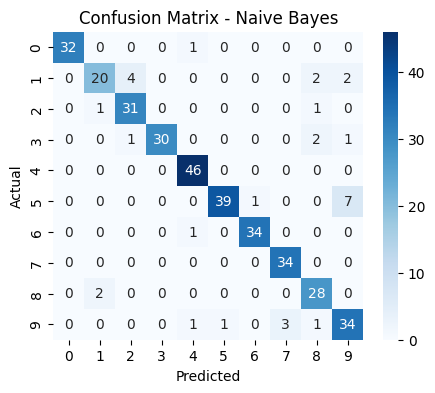

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.87      0.71      0.78        28
           2       0.86      0.94      0.90        33
           3       1.00      0.88      0.94        34
           4       0.94      1.00      0.97        46
           5       0.97      0.83      0.90        47
           6       0.97      0.97      0.97        35
           7       0.92      1.00      0.96        34
           8       0.82      0.93      0.87        30
           9       0.77      0.85      0.81        40

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.92      0.91      0.91       360



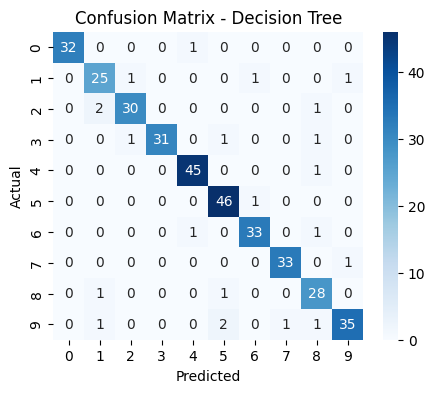

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.86      0.89      0.88        28
           2       0.94      0.91      0.92        33
           3       1.00      0.91      0.95        34
           4       0.96      0.98      0.97        46
           5       0.92      0.98      0.95        47
           6       0.94      0.94      0.94        35
           7       0.97      0.97      0.97        34
           8       0.85      0.93      0.89        30
           9       0.95      0.88      0.91        40

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



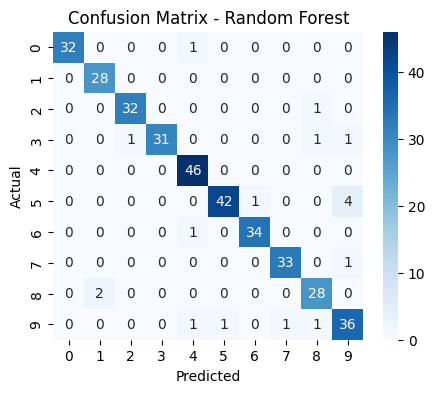

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       0.97      0.97      0.97        33
           3       1.00      0.91      0.95        34
           4       0.94      1.00      0.97        46
           5       0.98      0.89      0.93        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.90      0.93      0.92        30
           9       0.86      0.90      0.88        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



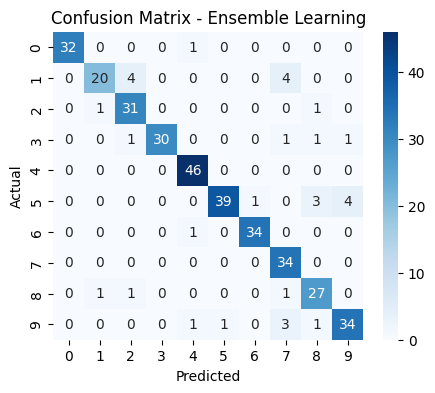

Classification Report - Ensemble Learning:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.91      0.71      0.80        28
           2       0.84      0.94      0.89        33
           3       1.00      0.88      0.94        34
           4       0.94      1.00      0.97        46
           5       0.97      0.83      0.90        47
           6       0.97      0.97      0.97        35
           7       0.79      1.00      0.88        34
           8       0.82      0.90      0.86        30
           9       0.87      0.85      0.86        40

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.90       360
weighted avg       0.92      0.91      0.91       360



In [ ]:
# Naive Bayes Classifier
cm_nb = confusion_matrix(y_test, naive_bayes_test_predictions_enriched)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

print("Classification Report - Naive Bayes:")
print(classification_report(y_test, naive_bayes_test_predictions_enriched))

# Decision Tree Classifier
cm_dt = confusion_matrix(y_test, decision_tree_test_predictions_enriched)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("Classification Report - Decision Tree:")
print(classification_report(y_test, decision_tree_test_predictions_enriched))

# Random Forest
cm_rf = confusion_matrix(y_test, random_forest_test_predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

print("Classification Report - Random Forest:")
print(classification_report(y_test, random_forest_test_predictions))

# Ensemble Learning
cm_ensemble = confusion_matrix(y_test, rounded_ensemble_test_predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ensemble Learning')
plt.show()

print("Classification Report - Ensemble Learning:")
print(classification_report(y_test, rounded_ensemble_test_predictions))

# **10-fold cross validation**

In [ ]:
# Train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X, y)

# Get Naive Bayes probabilities for entire dataset
naive_bayes_probabilities = naive_bayes_classifier.predict_proba(X)

# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X, y)

# Get Random Forest predictions for entire dataset
random_forest_predictions = random_forest_classifier.predict(X)

# Combine Naive Bayes probabilities with the original features for entire dataset
X_enriched = np.hstack((X, naive_bayes_probabilities))

# Create a KFold object for 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation for each classifier
nb_scores = cross_val_score(naive_bayes_classifier, X, y, cv=kf, scoring='accuracy')
dt_scores = cross_val_score(decision_tree_classifier, X_enriched, y, cv=kf, scoring='accuracy')
rf_scores = cross_val_score(random_forest_classifier, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Naive Bayes Cross-Validation Scores:", nb_scores)
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Random Forest Cross-Validation Scores:", rf_scores)

# Calculate and print the mean accuracy for each classifier
print("Mean Naive Bayes Cross-Validation Accuracy:", np.mean(nb_scores))
print("Mean Decision Tree Cross-Validation Accuracy:", np.mean(dt_scores))
print("Mean Random Forest Cross-Validation Accuracy:", np.mean(rf_scores))

Naive Bayes Cross-Validation Scores: [0.91111111 0.90555556 0.87777778 0.89444444 0.90555556 0.90555556
 0.92777778 0.89944134 0.88268156 0.88268156]
Decision Tree Cross-Validation Scores: [0.93333333 0.94444444 0.93333333 0.93333333 0.88888889 0.93888889
 0.90555556 0.91061453 0.93296089 0.9273743 ]
Random Forest Cross-Validation Scores: [0.97777778 0.97222222 0.98888889 0.98888889 0.96111111 0.96111111
 0.98888889 0.97765363 0.98882682 0.98882682]
Mean Naive Bayes Cross-Validation Accuracy: 0.8992582247051522
Mean Decision Tree Cross-Validation Accuracy: 0.9248727498448168
Mean Random Forest Cross-Validation Accuracy: 0.9794196151458723


In [ ]:
class EnsembleClassifier(BaseEstimator):
    def __init__(self, nb_weight=0.2, rf_weight=0.8):
        self.nb_weight = nb_weight
        self.rf_weight = rf_weight

    def fit(self, X, y):
        y = y.astype(int)
        # Train the Naive Bayes classifier
        self.nb_classifier = MultinomialNB()
        self.nb_classifier.fit(X, y)

        # Train Random Forest Classifier
        self.rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        self.rf_classifier.fit(X, y)

    def predict(self, X):
        # Get Naive Bayes probabilities for the input data
        nb_probabilities = self.nb_classifier.predict_proba(X)

        # Get Random Forest predictions for the input data
        rf_predictions = self.rf_classifier.predict(X)

        # Handle NaN values by replacing them with 0
        nb_probabilities[np.isnan(nb_probabilities)] = 0

        # Combine Naive Bayes probabilities and Random Forest predictions using weighted averaging
        ensemble_predictions = (
            self.nb_weight * nb_probabilities.argmax(axis=1) +
            self.rf_weight * rf_predictions
        )
        ensemble_predictions = np.round(ensemble_predictions).astype(int)
        return ensemble_predictions

# Create an instance of the EnsembleClassifier
ensemble_classifier = EnsembleClassifier()

# Create a KFold object for 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation for the ensemble classifier
ensemble_scores = cross_val_score(ensemble_classifier, X_enriched, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Ensemble Learning Cross-Validation Scores:", ensemble_scores)

# Calculate and print the mean accuracy for the ensemble classifier
print("Mean Ensemble Learning Cross-Validation Accuracy:", np.mean(ensemble_scores))

Ensemble Learning Cross-Validation Scores: [0.92777778 0.93333333 0.9        0.92222222 0.91666667 0.93333333
 0.95       0.92178771 0.89944134 0.89385475]
Mean Ensemble Learning Cross-Validation Accuracy: 0.9198417132216015
